In [1]:
# Import required libs
import seaborn as sb
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read cricketers data-set
cricketers = pd.read_csv("cricketers.csv", delimiter='\t')
data = cricketers.copy()

In [3]:
# Check some information related to the imported data-set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER                    109 non-null    object 
 1   matches_played            109 non-null    int64  
 2   innings_batted            109 non-null    int64  
 3   runs_scored               109 non-null    int64  
 4   highest_runs              109 non-null    int64  
 5   balls_faced               109 non-null    int64  
 6   average_runs              109 non-null    float64
 7   strike_rate               109 non-null    float64
 8   innings_bowled            109 non-null    int64  
 9   overs                     109 non-null    float64
 10  runs_given                109 non-null    int64  
 11  wickets_obtained          109 non-null    int64  
 12  average_runs_per_wicket   109 non-null    float64
 13  bowling_economy           109 non-null    float64
dtypes: float64

In [4]:
# Check some samples of the data
data.head(3)

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0


In [5]:
# Check some relevant stats about the data
data.describe(percentiles=[.25,.5,.75]).T

,count,mean,std,min,25%,50%,75%,max
matches_played,109.0,9.559633,5.161164,0.0,5.00,10.00,14.00,17.00
innings_batted,109.0,7.889908,4.982078,0.0,4.00,7.00,13.00,17.00
runs_scored,109.0,173.633028,182.356522,0.0,36.00,99.00,260.00,735.00
highest_runs,109.0,43.495413,29.830268,0.0,20.00,40.00,62.00,128.00
balls_faced,109.0,124.669725,123.670265,0.0,33.00,76.00,188.00,516.00
average_runs,109.0,22.360092,16.093453,0.0,11.80,21.16,30.00,75.83
strike_rate,109.0,122.258716,48.576709,0.0,109.09,130.26,146.04,300.00
innings_bowled,109.0,4.513761,5.449456,0.0,0.00,2.00,8.00,17.00
overs,109.0,13.894495,18.395495,0.0,0.00,3.00,26.00,68.00
runs_given,109.0,119.935780,152.807630,0.0,0.00,27.00,223.00,533.00


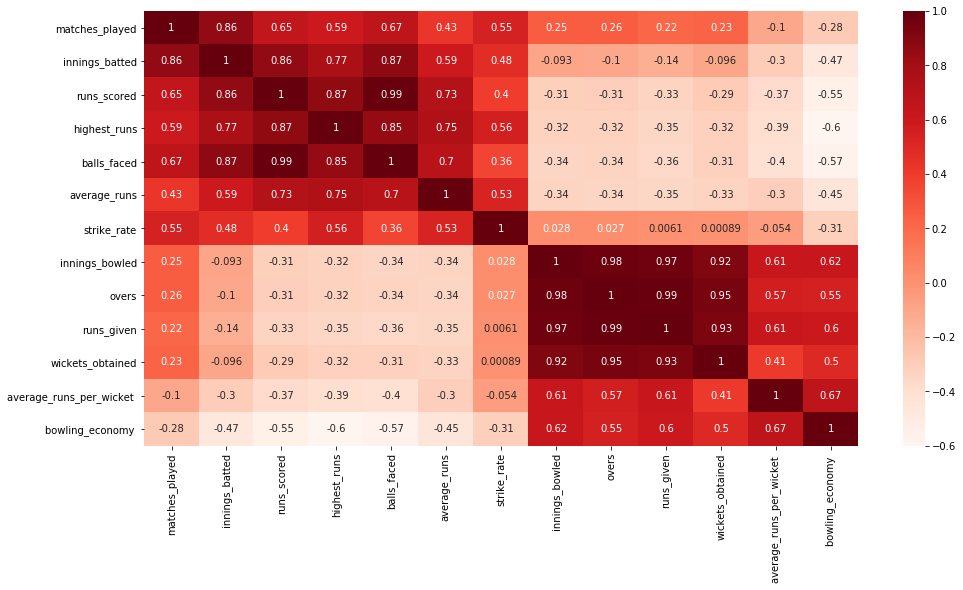

In [6]:
plt.figure(figsize=(16,8))
sb.heatmap(data.corr(), cmap='Reds', annot=True)
plt.show()

In [7]:
# Standardize features to have k-means work properly (using z-score)
# Ignore Categorical Column (Player Names)
data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].mean())/data.iloc[:,1:].std()
#data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].min())/(data.iloc[:,1:].max() - data.iloc[:,1:].min())
display(data.head(3), data.tail(2))

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,0.085323,0.222817,-0.217338,0.083961,-0.199480,-0.348595,0.447566,-0.828296,-0.755321,-0.784881,-0.700918,-0.791155,-1.078849
1,AB de Villiers,0.472833,0.624256,1.680044,1.558973,1.215573,1.924379,1.076262,-0.828296,-0.755321,-0.784881,-0.700918,-0.791155,-1.078849
2,Abhishek Sharma,-1.270960,-0.981500,-0.606685,0.083961,-0.741243,2.525245,1.413049,-0.828296,-0.755321,-0.784881,-0.700918,-0.791155,-1.078849


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
107,Basil Thampi,-1.852224,-1.583658,-0.952162,-1.458097,-1.008082,-1.389391,-2.516818,-0.094278,-0.206273,-0.038845,0.191606,0.249426,1.057977
108,Ben Laughlin,-1.852224,-1.583658,-0.952162,-1.458097,-1.008082,-1.389391,-2.516818,0.456236,0.386263,0.602484,0.905625,0.232996,1.024458


In [8]:
# Function to Calculate Norms
def calcMinkowskiDist(norm, vec1, vec2):
    if(norm < 1 or not(isinstance(norm, int))):
        raise Exception('Norm must be a postive integer!')
    dist = 0
    for i in range(len(vec1)):
        dist += (abs(vec1[i] - vec2[i]))**norm
    return dist**(1/norm)

# Test Manhatten, Euclidean, Supremum (L1, L2 and L_inf norms)
calcMinkowskiDist(1, [0,0], [3,4]), calcMinkowskiDist(2, [0,0], [3,4]), calcMinkowskiDist(110, [0,0], [3,4])

(7.0, 5.0, 4.0)

In [9]:
# Mahalanobis Distance Function
def calcMahalanobisDist(vec, mean, covMat):
    return (vec-mean).T.dot(sp.linalg.pinv(covMat)).dot(vec-mean)

In [10]:
# Initialize Random Centroids from Data Points
def initRandomCentroids(n=2):
    return np.random.permutation(n)
initRandomCentroids(5)

array([4, 3, 1, 0, 2])

In [11]:
# Lloyd's Algorithm for K-Means EM
def coordinateDescent(data, dist_norm=2, clusters=2, iters=100, tol=10e-6):
    # Distortion history
    J_hist = []
    # Initial centroids picked from data
    centroids = data[initRandomCentroids(clusters)]
    #centroids = np.array([[1,1], [1.1,.1], [1,1.2], [1.3,1]])
    
    # Run for specified iterations
    for i in range(iters):
        # Membership allocation for each of the clusters
        membership = [-1 for i in range(data.shape[0])]
        membership_index = {new_lists:[] for new_lists in range(clusters)}
        for j in range(data.shape[0]):
            distances = [calcMinkowskiDist(dist_norm, data[j], centroids[k]) for k in range(clusters)]
            membership[j] = distances.index(min(distances))
            membership_index[distances.index(min(distances))].append(j)
        
        # Copy centroids for tolerance calculation
        old_centroids = centroids.copy()
        J, e = 0, 0
        for k,v in membership_index.items():
            # Update centroids
            centroids[k] = np.mean(data[v], axis=0)
            # Tolerance check to stop iterations
            e += calcMinkowskiDist(dist_norm, old_centroids[k].reshape(-1,1), centroids[k].reshape(-1,1))
            # Calculate Distortion
            for l in v:
                J += np.square(calcMinkowskiDist(dist_norm, centroids[k].reshape(-1,1), data[l].reshape(-1,1)))
        J_hist.append(J[0])
        # Break if centroids don't move much
        if e <= tol:
            break
    return centroids, membership, J_hist

# Generate clusterings for a pair of attributes
X = data[['average_runs', 'bowling_economy ']].values
centroids, membership, J_history = coordinateDescent(X, dist_norm=2, clusters=2)

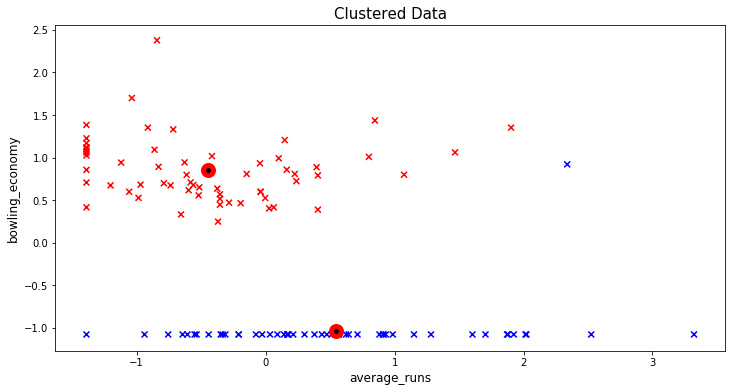

In [12]:
# Plot scatter of the attribute pair and highlight the centroids
plt.figure(figsize=[12,6])
# Choose red and blue colours for 2 clusters
colours = ['red' if membership[i]==0 else 'blue' for i in range(len(membership))]

plt.scatter(x=X[:,0], y=X[:,1], color=colours, marker='x')
plt.scatter(centroids[:,0], centroids[:,1], color='black', s=100, edgecolors='red', linewidths=5)
plt.title('Clustered Data',size=15)
plt.xlabel('average_runs',size=12)
plt.ylabel('bowling_economy',size=12)
plt.show()

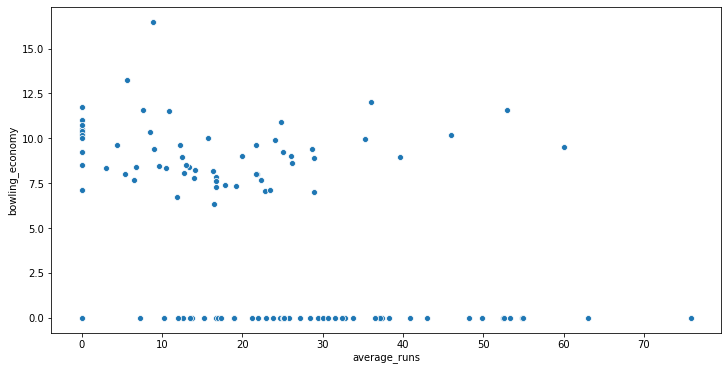

In [13]:
# Original data for cluster interpretation
plt.figure(figsize=[12,6])
sb.scatterplot(x=cricketers.average_runs.values.flatten(), y=cricketers[['bowling_economy ']].values.flatten())
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.show()

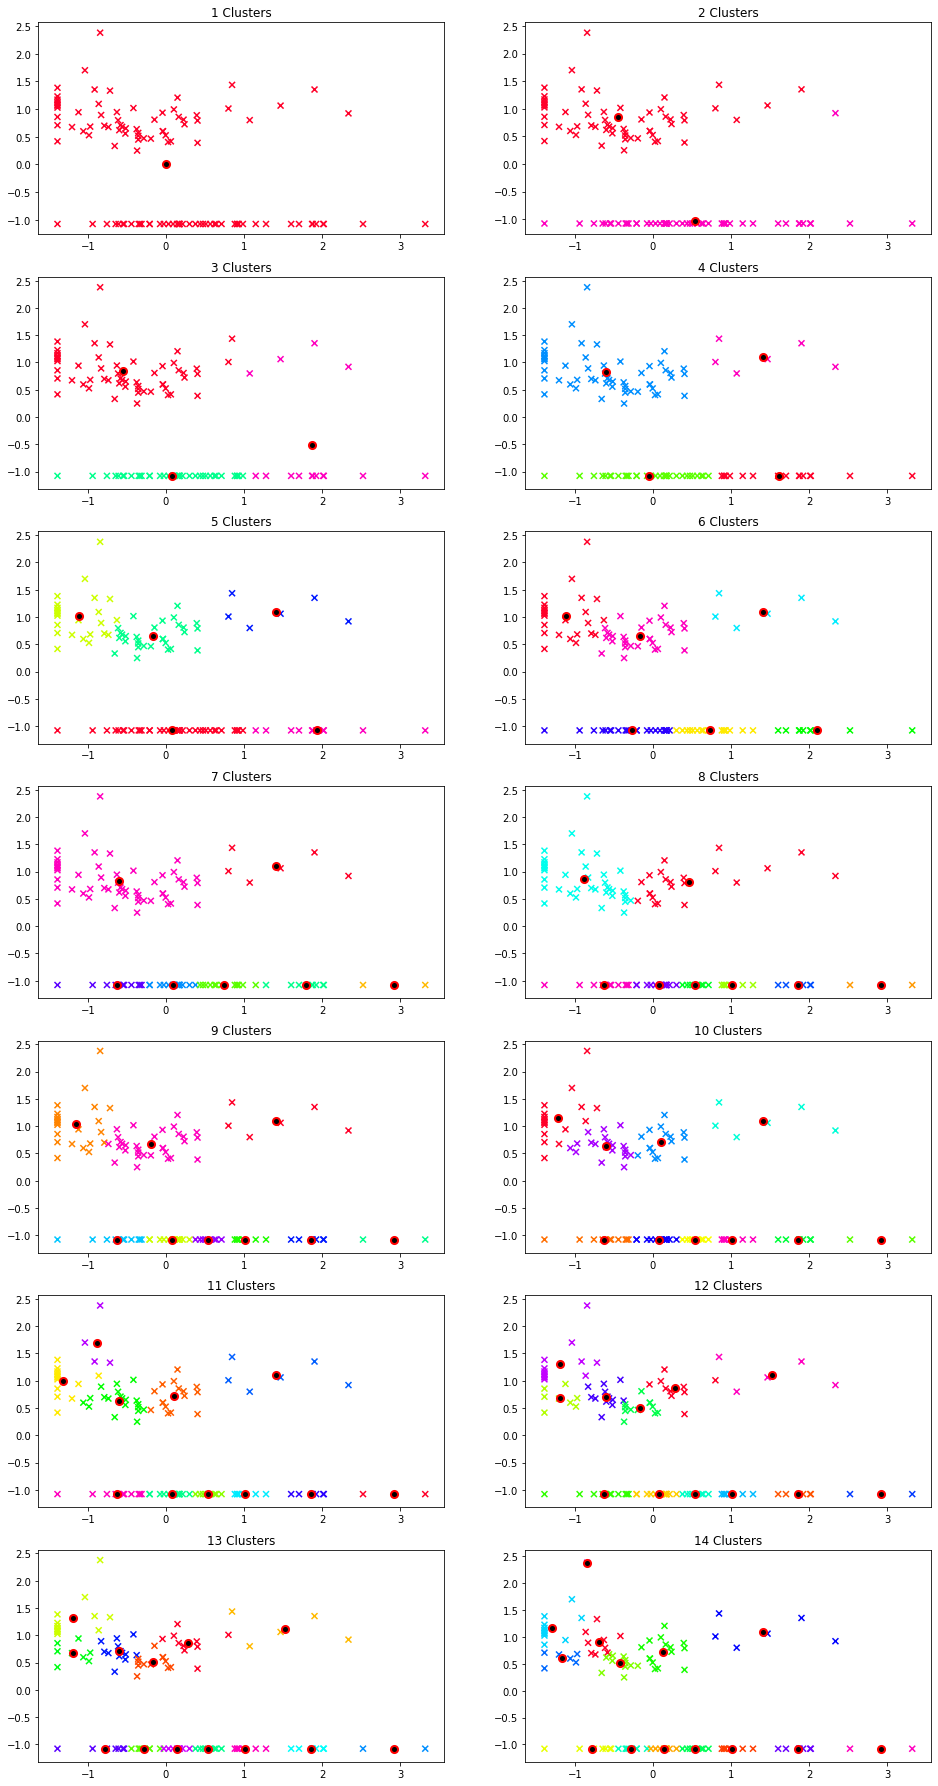

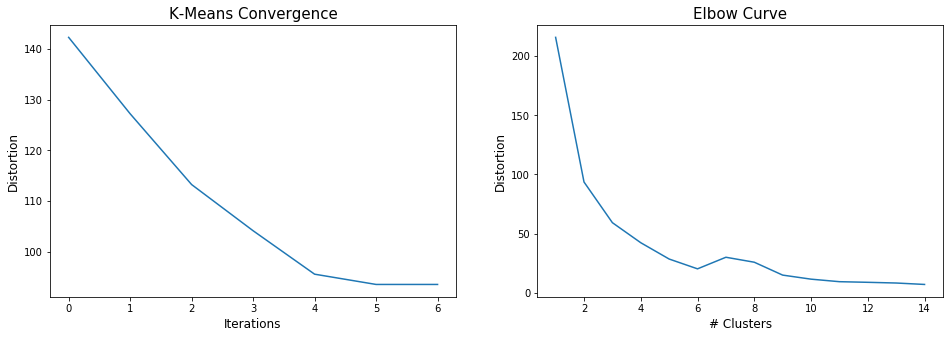

In [14]:
# Plots and Figures
plt.figure(figsize=[16,32])

# Calculate various clusterings
# Note that this is done for far more clusters(14). Clusters for K=3,4,5 were created and copied into word document
distortions = []
clusters = range(1, 15)
for i in clusters:
    centroids, membership, J_hist = coordinateDescent(X, dist_norm=2, clusters=i)
    distortions.append(J_hist[-1])
    plt.subplot(7,2,i)
    plt.title(str(i) + ' Clusters')
    plt.scatter(x=X[:,0], y=X[:,1], c=membership, marker='x', cmap='gist_rainbow')
    plt.scatter(centroids[:,0], centroids[:,1], color='black', s=50, edgecolors='red', linewidths=2)
plt.show()
    
# Plot Convergence for 2 clusters (rest follow the same pattern)
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.plot(J_history)
plt.title('K-Means Convergence',size=15)
plt.xlabel('Iterations',size=12)
plt.ylabel('Distortion',size=12)
plt.subplot(122)

# Plot Elbow Curve for upto 9 clusters
plt.plot(clusters, distortions)
plt.title('Elbow Curve',size=15)
plt.xlabel('# Clusters',size=12)
plt.ylabel('Distortion',size=12)
plt.show()

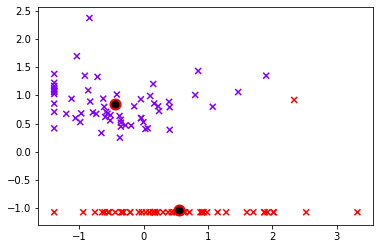

In [15]:
# Compare and confirm correct clustering with sklearn kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', algorithm='full').fit(X)
plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_, marker='x', cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker='o', linewidths=2,
            color='black', edgecolors='red')
plt.show()

In [16]:
cmaps=['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r','BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2',
       'Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd','OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r',
       'Paired','Paired_r','Pastel1','Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r','PuBu_r',
       'PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r','RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu',
       'RdYlBu_r','RdYlGn','RdYlGn_r','Reds','Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',
       'Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd','YlOrRd_r','afmhot','afmhot_r',
       'autumn','autumn_r','binary','binary_r','bone','bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool',
       'cool_r','coolwarm','coolwarm_r','copper','copper_r','cubehelix','cubehelix_r','flag','flag_r','gist_earth',
       'gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r','gist_rainbow',
       'gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg','gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r',
       'gray','gray_r','hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno','inferno_r','jet','jet_r','magma','magma_r',
       'mako','mako_r','nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r','plasma','plasma_r',
       'prism','prism_r','rainbow','rainbow_r','rocket','rocket_r','seismic','seismic_r','spring','spring_r','summer',
       'summer_r','tab10','tab10_r','tab20','tab20_r','tab20b','tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',
       'twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']
# for i in cmaps:
#     plt.scatter(x=X[:,0], y=X[:,1], c=membership, cmap=i)
#     plt.title(i)
#     plt.show()